<h2>Visualizing Birthday of Hong Kongers</h2>
<p>The story begins when I saw the interesting picture shared by Chris Hadfield (See Below) and wonder if I could do the same for Hong Kongers.</p>

<img src="https://scontent.fsyd4-1.fna.fbcdn.net/v/t1.0-9/163677741_284707846355926_8139899004885134793_o.jpg?_nc_cat=1&ccb=1-3&_nc_sid=730e14&_nc_ohc=fZcs6YvcFrAAX-NxFHt&_nc_ht=scontent.fsyd4-1.fna&oh=857af75b4db30b9e5282d65fa0792a45&oe=607F1FCC">

<p>I then came across with an <a href="https://www.inmediahk.net/node/1057804">article</a> wrote by Carpier Leung.</p>

<p>So here we go!</p> 
<p>Oh and I have also written a blog (in Chinese) for this Notebook, see it <a href="">here</a></p>

Reference:
https://www.statistics.gov.hk/pub/B10100022020MM03B0100.pdf
https://www.statistics.gov.hk/pub/B10100022021MM03B0100.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('dataset/birth_by_month.csv')

<p>Let's have a look at the raw data</p>

<p>It was a bit messy from the time I get it from Hong Kong Government website, I pre-preprocessed it by removing some of their coding and also changing the sex from sex_01 and sex_01 to 0 and 1, which represents male and female respectively. Originally I was thinking to do a graph for each sex, but I guess I would just do a combined sex first.</p>

In [13]:
df

,year,month,sex,monthly_total
0,2019,1,0,2566
1,2019,2,0,2008
2,2019,3,0,2242
3,2019,4,0,2256
4,2019,5,0,2394
5,2019,6,0,2139
6,2019,7,0,2244
7,2019,8,0,2278
8,2019,9,0,2269
9,2019,10,0,2484


In [14]:
df_2019 = df[df['year'] == 2019].copy()
df_2020 = df[df['year'] == 2020].copy()

In [15]:
df_2019 = df_2019.groupby(['month']).sum()
df_2020 = df_2020.groupby(['month']).sum()
df_2019.reset_index(inplace=True)
df_2020.reset_index(inplace=True)
df_2019.drop(columns = ['year','sex'], inplace=True)
df_2020.drop(columns = ['year','sex'], inplace=True)
df_2019.rename(columns={"monthly_total": "2019"}, inplace = True)
df_2020.rename(columns={"monthly_total": "2020"}, inplace = True)

<p>Raw data was bit messy, so this is what we got:</p>

In [16]:
df_2019

,month,2019
0,1,4925
1,2,3907
2,3,4371
3,4,4407
4,5,4590
5,6,4143
6,7,4232
7,8,4342
8,9,4293
9,10,4744


<p>Both looks okay now, so we should now concat the two dataframe as one. I think there should be a smarter way to do this (e.g. removing duplicate cols), but I would just do it in a less efficient way anyway:</p>

In [17]:
year_df = pd.concat([df_2019, df_2020['2020']], axis = 1)
year_df.set_index('month', inplace = True)

<p>Then we shall create the heatmap-style plot!</p>

In [18]:
import seaborn as sns
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

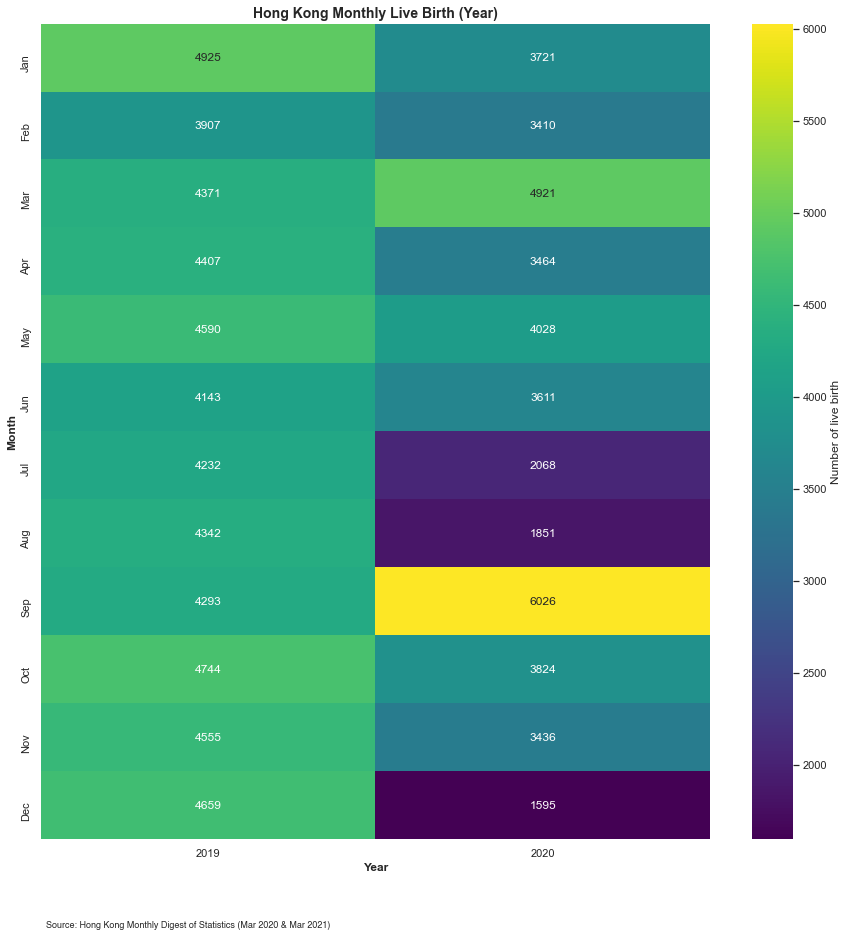

In [23]:
p1 = sns.heatmap(year_df, annot=True, fmt="d", cmap="viridis", square = False, cbar_kws={'label': 'Number of live birth'})
p1.axes.set_title("Hong Kong Monthly Live Birth (Year)" ,weight='bold',fontsize=14)
sns.set(font="helvetica")
p1.set_xlabel("Year",fontsize=12 ,weight='bold')
p1.set_ylabel("Month",fontsize=12,weight='bold')
p1.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
p1.text(0.015, 13.3,'Source: Hong Kong Monthly Digest of Statistics (Mar 2020 & Mar 2021)', fontsize=9)
sns.set(rc={'figure.figsize':(15,15)})

In [24]:
# Save the figure!

p1.get_figure().savefig('output_new.png')
year_df.to_csv('dataset/year_df.csv')

In [336]:
wide_year_df = pd.read_csv('dataset/year_df.csv')

In [340]:
wide_year_df['average'] = wide_year_df.mean(axis=1).astype(int)

In [341]:
wide_year_df.columns

Index(['month', '2003', '2004', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', 'average'],
      dtype='object')

In [342]:
wide_year_df.set_index('month', inplace=True)

In [343]:
wide_year_df

,2003,2004,2012,2013,2014,2015,2016,2017,2018,2019,2020,average
month,,,,,,,,,,,,
1,4287,3760,7216,5903,5226,5958,4922,4962,5322,4925,3721,4683
2,3719,3205,7580,4560,4324,4807,4646,5097,4257,3907,3410,4126
3,3905,3780,7789,4491,4934,5531,5060,5144,4590,4371,4921,4543
4,3673,3503,6910,4653,4659,4678,5016,4301,4184,4407,3464,4121
5,3837,3513,7770,4514,5154,4591,4961,4685,4572,4590,4028,4351
6,3699,3756,7348,4194,4779,4995,4898,4651,4305,4143,3611,4198
7,3954,3972,7478,4721,5077,4796,4637,4502,4370,4232,2068,4151
8,3571,4137,8012,4760,4999,4703,5078,4531,4476,4342,1851,4205
9,3963,4235,7343,4696,5195,4865,5184,4640,4099,4293,6026,4545


In [349]:
wide_year_df.rename(columns = {'average' : '平均'}, inplace=True)

In [350]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 


sns.set(font="Arial Unicode MS")

In [351]:
import seaborn as sns

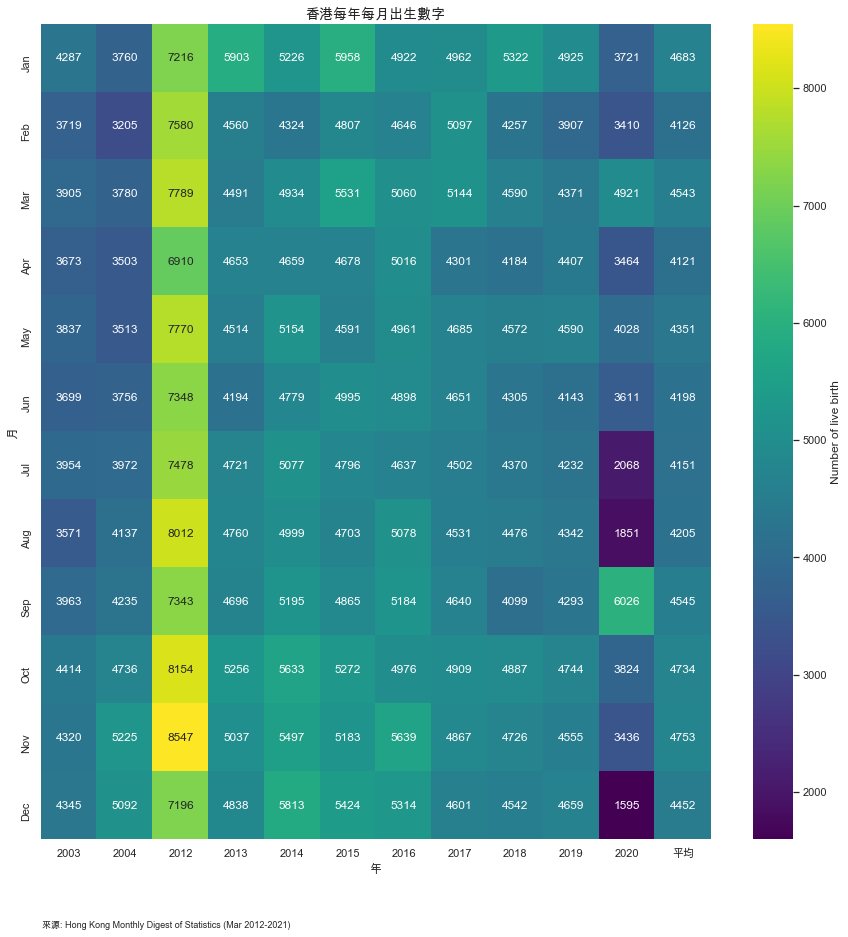

In [352]:
sns.set(font="Arial Unicode MS")
p2 = sns.heatmap(wide_year_df, annot=True, fmt="d", cmap="viridis", square = False, cbar_kws={'label': 'Number of live birth'})
p2.axes.set_title("香港每年每月出生數字" ,weight='bold',fontsize=14)
# sns.set(font="helvetica")
p2.set_xlabel("年",fontsize=12 ,weight='bold')
p2.set_ylabel("月",fontsize=12,weight='bold')
p2.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
p2.text(0.015, 13.3,'來源: Hong Kong Monthly Digest of Statistics (Mar 2012-2021)', fontsize=9)
sns.set(rc={'figure.figsize':(15,15)})

In [353]:
p2.get_figure().savefig('all_years.png')

In [305]:
annual_total = pd.read_csv('dataset/annual_birth_total.csv')

In [306]:
annual_total.tail(5)

,year,number,confidence
30,2016,60856,45.55
31,2017,56890,53.15
32,2018,54330,47.30
33,2019,53168,39.30
34,2020,41955,0.00


In [307]:
annual_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        35 non-null     int64  
 1   number      35 non-null     int64  
 2   confidence  35 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 968.0 bytes


In [308]:
annual_total.columns

Index(['year', 'number', 'confidence'], dtype='object')

In [309]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

In [252]:
annual_total.rename(columns = {' number' : 'number'}, inplace=True)

Text(0, 0.5, '出生人數')

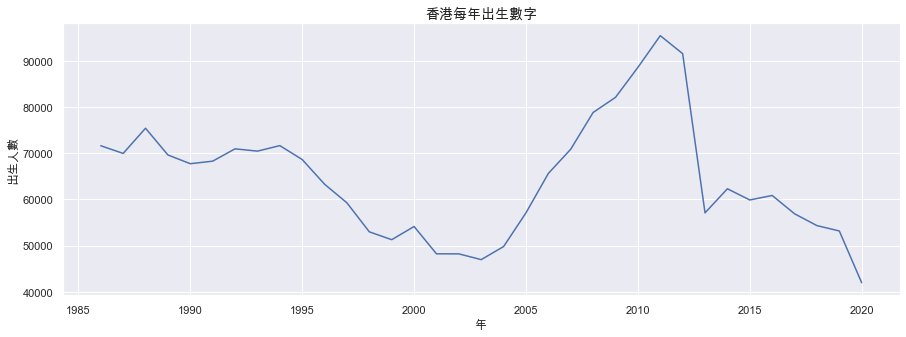

In [333]:
sns.set(font="Arial Unicode MS")
p3 = sns.lineplot(x='year', y='number', data=annual_total,  markers=True, legend = False)
sns.set(rc={'figure.figsize':(15,5)})

# p3.text(0, 0,'Source: Hong Kong Monthly Digest of Statistics (Mar 2012-2021)', fontsize=9)
p3.axes.set_title("香港每年出生數字" ,weight='bold',fontsize=14)
p3.set_xlabel("年",fontsize=12 ,weight='bold')
p3.set_ylabel("出生人數",fontsize=12,weight='bold')

# p3.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])



Text(0, 0.5, '分數(%)')

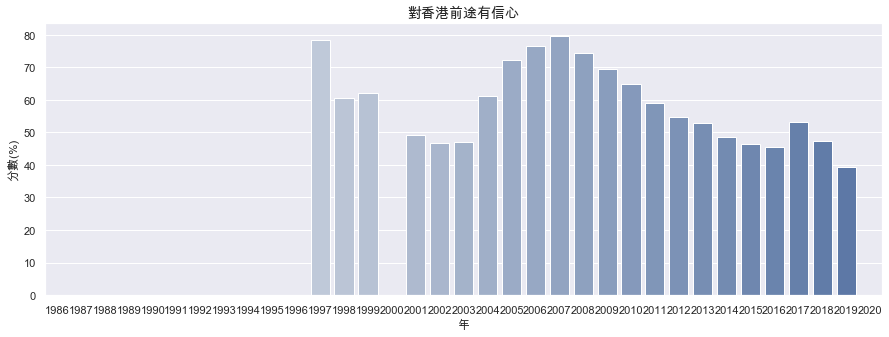

In [334]:
sns.set(font="Arial Unicode MS")
p4 = sns.barplot(x='year', y='confidence', data=annual_total, palette="light:b")
sns.set(rc={'figure.figsize':(15,5)})

# p3.text(0, 0,'Source: Hong Kong Monthly Digest of Statistics (Mar 2012-2021)', fontsize=9)
p4.axes.set_title("對香港前途有信心" ,weight='bold',fontsize=14)
p4.set_xlabel("年",fontsize=12 ,weight='bold')
p4.set_ylabel("分數(%)",fontsize=12,weight='bold')

# p3.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [335]:
p3.get_figure().savefig('year_trend.png')
p4.get_figure().savefig('year_confidence.png')